# Bỏ cột ít ảnh hưởng

## Chuẩn bị


In [ ]:
# https://drive.google.com/file/d/1B9mFuCE4KqPdMrAD_JBWYArxFaSugXSC/view?usp=sharing
!gdown '1B9mFuCE4KqPdMrAD_JBWYArxFaSugXSC'

Downloading...
From: https://drive.google.com/uc?id=1B9mFuCE4KqPdMrAD_JBWYArxFaSugXSC
To: /content/Data_dai_hoc.csv
100% 56.2k/56.2k [00:00<00:00, 93.0MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('Data_dai_hoc.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         376 non-null    float64
 1   location      376 non-null    object 
 2   companyType   376 non-null    object 
 3   salaryType    376 non-null    object 
 4   contractType  376 non-null    object 
 5   jobType       376 non-null    object 
 6   experience    376 non-null    object 
 7   gender        376 non-null    object 
 8   vacacies      376 non-null    float64
 9   education     376 non-null    object 
 10  minAge        376 non-null    float64
 11  maxAge        376 non-null    int64  
 12  skill         376 non-null    object 
 13  Partner       376 non-null    object 
 14  Salary        376 non-null    float64
dtypes: float64(4), int64(1), object(10)
memory usage: 44.2+ KB


In [ ]:
q1 = data['Salary'].quantile(0.25)
q3 = data['Salary'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]

In [ ]:
data

,index,salaryType,jobType,gender,vacacies,education,minAge,maxAge,Salary
0,2.0,3,9,0,2.0,1,22.0,35,10500000.0
1,30.0,3,10,2,1.0,1,20.0,35,7500000.0
2,34.0,3,10,0,1.0,1,25.0,40,15000000.0
3,35.0,3,10,0,10.0,0,22.0,37,10000000.0
4,37.0,3,10,0,1.0,1,22.0,30,7000000.0
...,...,...,...,...,...,...,...,...,...
371,1941.0,3,0,0,2.0,1,19.0,26,6500000.0
372,1951.0,3,0,2,1.0,0,22.0,35,10000000.0
373,1963.0,3,13,0,2.0,1,18.0,30,9000000.0
374,1972.0,1,13,2,1.0,1,18.0,30,26000.0


In [ ]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
affect = []
for column in data.columns:
  if column == 'Salary':
    continue
  model = ols(f'Salary ~ {column}', data = data).fit()
  anova_table = sm.stats.anova_lm(model, typ=2)
  p_value = anova_table['PR(>F)'][0]
  if p_value < 0.05:
    affect.append(column)
print(f"Các biến phân loại có ảnh hưởng tới lương: {affect}")

Các biến phân loại có ảnh hưởng tới lương: ['salaryType', 'contractType', 'jobType', 'experience', 'gender', 'vacacies', 'education', 'minAge', 'maxAge', 'skill']


In [ ]:
def timBienAnhHuong(df2: pd.DataFrame, price: pd.Series) -> list:
  ds = []
  for column_name in df2:
        if kiemTraMucDoAnhHuong(df2[column_name], price):
            ds.append((column_name,kiemTraMucDoAnhHuong(df2[column_name], price)))
  return ds

In [ ]:
import scipy.stats as stats
def kiemTraMucDoAnhHuong(s1: pd.Series, s2: pd.Series) -> str:
    r, p = stats.pearsonr(s1, s2)
    if p < 0.05:
        if abs(r) <= 0.3:
            return "Không"
        elif abs(r) > 0.3 and abs(r) <= 0.5:
            return "Yếu"
        elif abs(r) > 0.5 and abs(r) <= 0.8 :
            return "Vừa"
        elif abs(r) > 0.8 :
            return "Mạnh"
    else:
        return "Không ảnh hưởng"

In [ ]:
def timBienAnhHuong(df2: pd.DataFrame, price: pd.Series) -> list:
  ds = []
  for column_name in df2:
        if kiemTraMucDoAnhHuong(df2[column_name], price):
            ds.append((column_name,kiemTraMucDoAnhHuong(df2[column_name], price)))
  return ds

In [ ]:
df3 = data.select_dtypes(include = 'number')
df3['index'].astype(int)
df3['minAge'].astype(int)
df3['vacacies'].astype(int)
result_list = timBienAnhHuong(df3,data['Salary'])

In [ ]:
result_list

[('index', 'Không ảnh hưởng'),
 ('vacacies', 'Không'),
 ('minAge', 'Không'),
 ('maxAge', 'Không'),
 ('Salary', 'Mạnh')]

In [ ]:
data = data.drop(['location', 'companyType', 'contractType', 'experience', 'skill', 'Partner'], axis=1)
data['Salary'] = list(data['Salary'].astype(float))

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

bien_phan_loai = data.select_dtypes(['object']).columns
for column in bien_phan_loai:
    if column != 'Salary':
        data[column] = encode.fit_transform(data[column])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold

## Huấn luyện

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

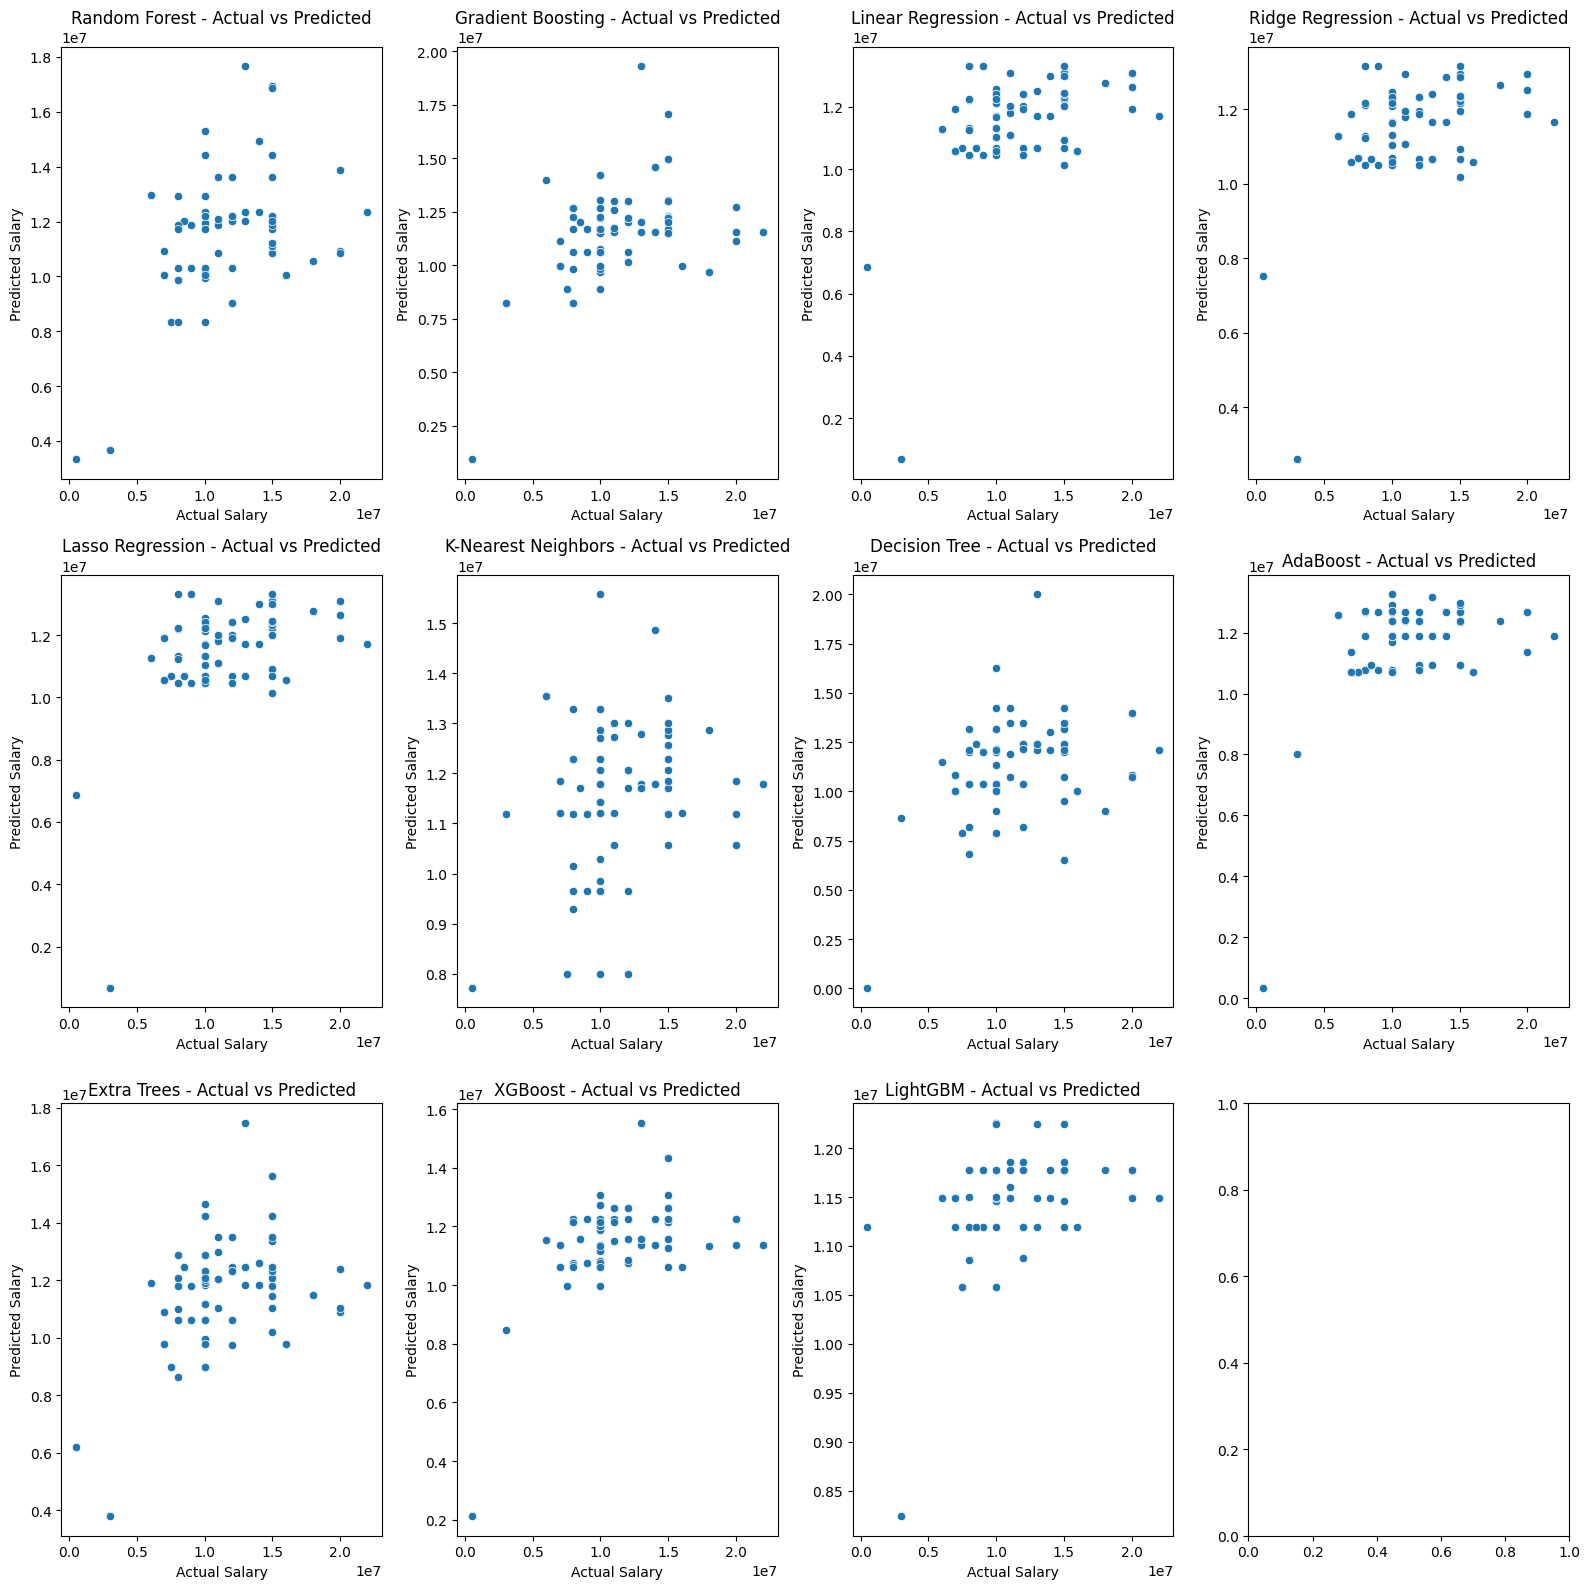

In [ ]:
# Chuẩn bị dữ liệu (thay đổi tên cột và đường dẫn dữ liệu tương ứng)
X = data.drop('Salary', axis=1)
y = data['Salary']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Thiết lập các tham số cần tìm kiếm
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
    'Lasso Regression': {'alpha': [0.1, 1, 10], 'tol': [0.001, 0.01, 0.1]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'Extra Trees': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_samples': [5, 10, 20]}
}

# K-fold Cross Validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Grid Search và huấn luyện mô hình
best_models = {}

# Kích thước của ô vẽ
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
axs = axs.flatten()

best_params = []
mses = []
r2s = []
model_names = []

# Grid Search và huấn luyện mô hình
for i, (model_name, model) in enumerate(models.items()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring='neg_mean_squared_error', cv=kf)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    predictions = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    model_names.append(model_name)
    best_params.append(grid_search.best_params_)
    mses.append(mse)
    r2s.append(r2)

    # Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
    sns.scatterplot(x=y_test, y=predictions, ax=axs[i])
    axs[i].set_title(f'{model_name} - Actual vs Predicted')
    axs[i].set_xlabel('Actual Salary')
    axs[i].set_ylabel('Predicted Salary')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

In [ ]:
info_model = {'Model': model_names, 'Best params': best_params, 'MSE': mses, 'R2': r2s}
info_model= pd.DataFrame(info_model)
info_model

,Model,Best params,MSE,R2
0,Random Forest,"{'max_depth': 10, 'min_samples_split': 10, 'n_...",1.140454e+13,0.182633
1,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.193697e+13,0.144474
2,Linear Regression,{},1.112212e+13,0.202874
3,Ridge Regression,"{'alpha': 10, 'solver': 'saga'}",1.117708e+13,0.198936
4,Lasso Regression,"{'alpha': 10, 'tol': 0.1}",1.112215e+13,0.202873
5,K-Nearest Neighbors,"{'algorithm': 'kd_tree', 'n_neighbors': 7, 'we...",1.319911e+13,0.054016
6,Decision Tree,"{'max_depth': None, 'min_samples_leaf': 2, 'mi...",1.399066e+13,-0.002714
7,AdaBoost,"{'learning_rate': 0.2, 'n_estimators': 50}",1.134401e+13,0.186972
8,Extra Trees,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",1.183419e+13,0.151841
9,XGBoost,"{'learning_rate': 0.01, 'max_depth': 3, 'min_c...",1.106059e+13,0.207285


# Giữ cột ít ảnh hưởng

## Chuẩn bị


In [ ]:
# https://drive.google.com/file/d/1B9mFuCE4KqPdMrAD_JBWYArxFaSugXSC/view?usp=sharing
!gdown '1B9mFuCE4KqPdMrAD_JBWYArxFaSugXSC'

Downloading...
From: https://drive.google.com/uc?id=1B9mFuCE4KqPdMrAD_JBWYArxFaSugXSC
To: /content/Data_dai_hoc.csv
100% 56.2k/56.2k [00:00<00:00, 91.9MB/s]


In [ ]:
import pandas as pd

data = pd.read_csv('Data_dai_hoc.csv')

In [ ]:
data.info()

In [ ]:
q1 = data['Salary'].quantile(0.25)
q3 = data['Salary'].quantile(0.75)

iqr = q3 - q1

lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['Salary'] >= lower_bound) & (data['Salary'] <= upper_bound)]

In [ ]:
# data = data.drop(['location', 'companyType', 'contractType', 'experience', 'skill', 'Partner'], axis=1)
data['Salary'] = list(data['Salary'].astype(float))

In [ ]:
from sklearn.preprocessing import LabelEncoder

encode = LabelEncoder()

bien_phan_loai = data.select_dtypes(['object']).columns
for column in bien_phan_loai:
    if column != 'Salary':
        data[column] = encode.fit_transform(data[column])

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold

## Huấn luyện

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

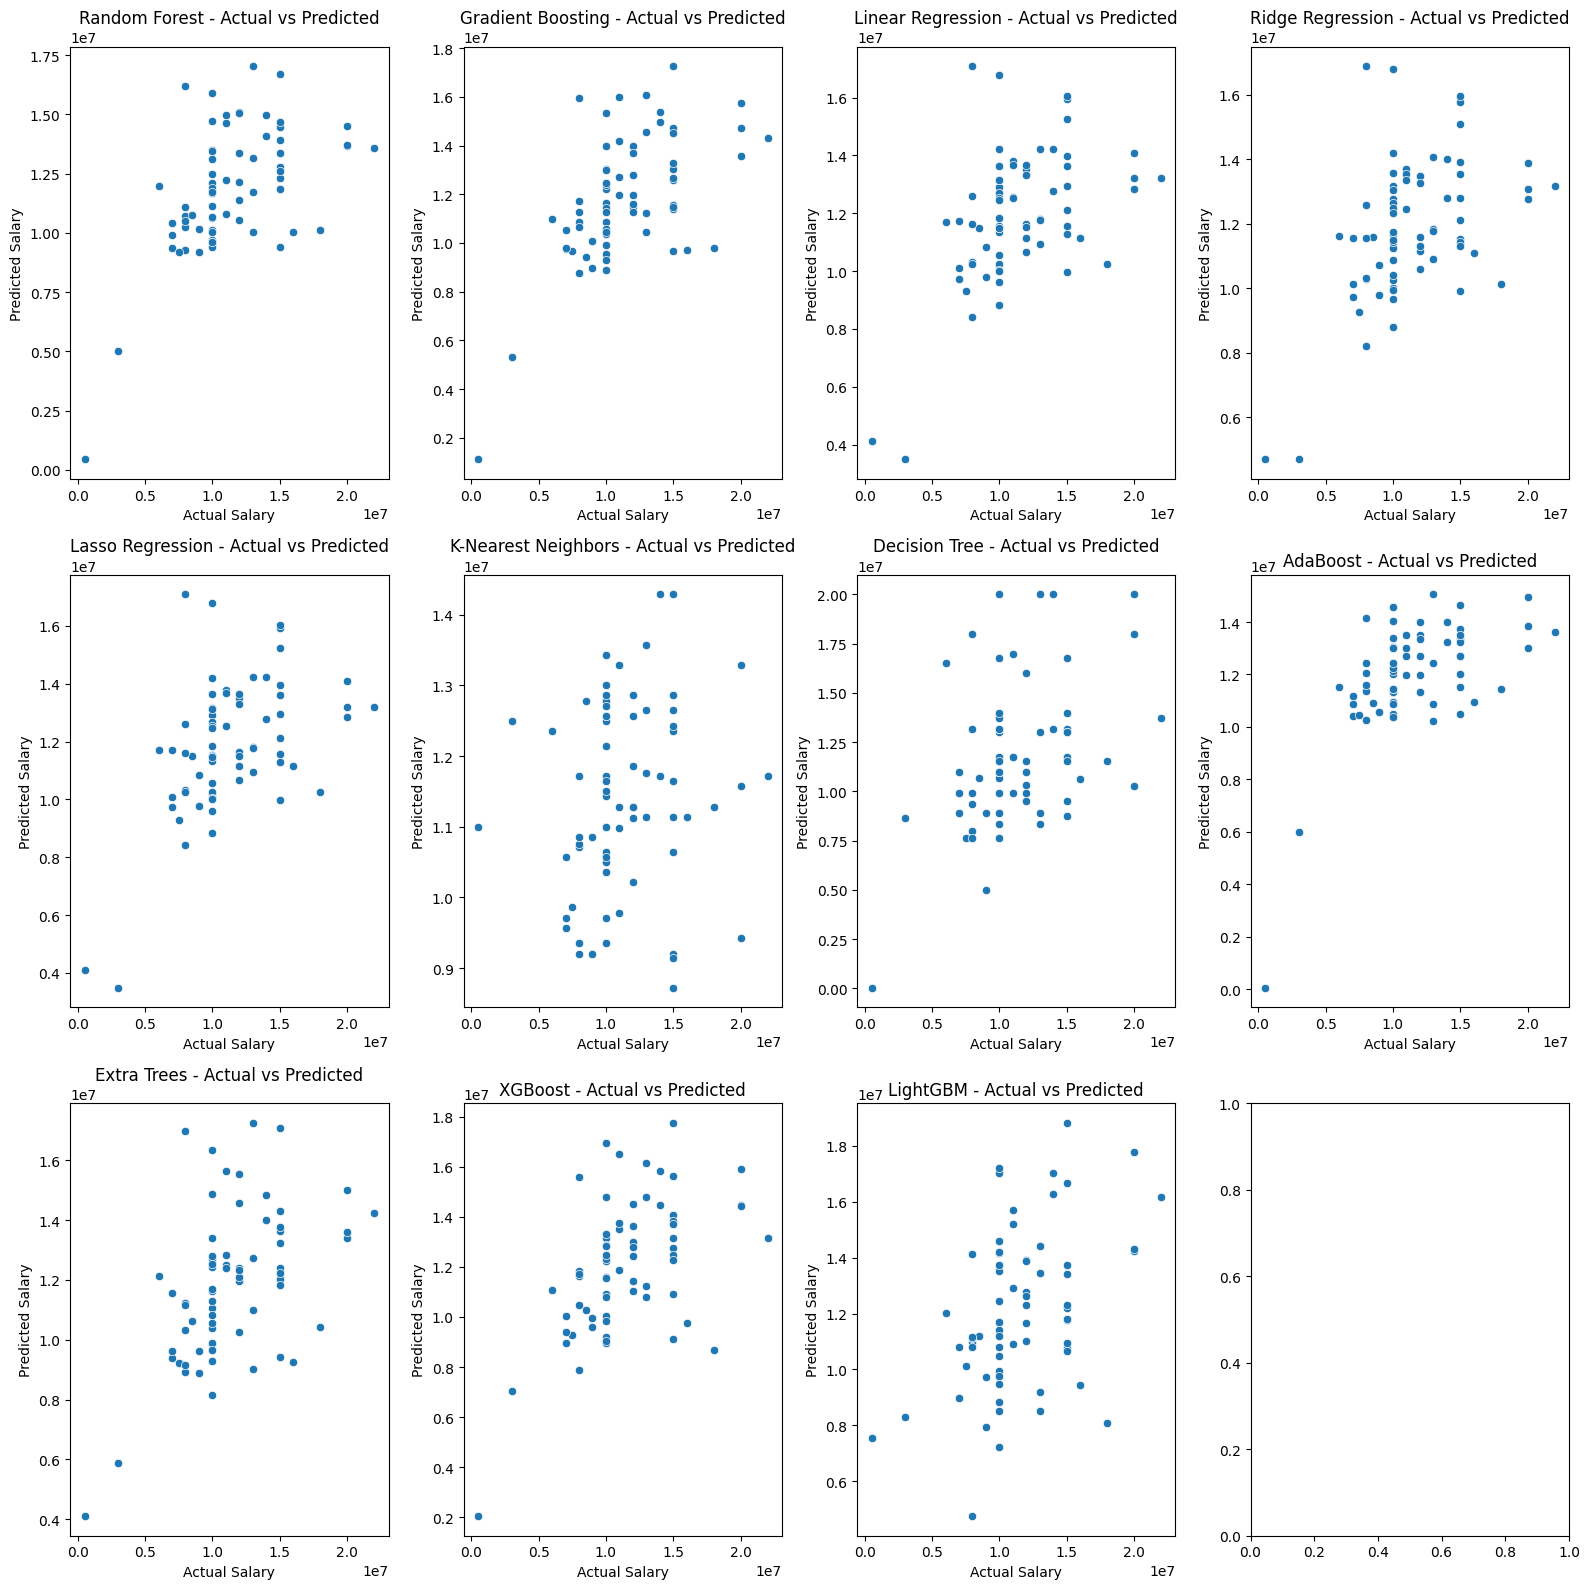

In [ ]:
# Chuẩn bị dữ liệu (thay đổi tên cột và đường dẫn dữ liệu tương ứng)
X = data.drop('Salary', axis=1)
y = data['Salary']

# Chia dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Xây dựng và huấn luyện mô hình
models = {
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'K-Nearest Neighbors': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Extra Trees': ExtraTreesRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor()
}

# Thiết lập các tham số cần tìm kiếm
param_grid = {
    'Random Forest': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]},
    'Gradient Boosting': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]},
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1, 10], 'solver': ['svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']},
    'Lasso Regression': {'alpha': [0.1, 1, 10], 'tol': [0.001, 0.01, 0.1]},
    'K-Nearest Neighbors': {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree', 'brute']},
    'Decision Tree': {'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2]},
    'Extra Trees': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20, 30], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]},
    'XGBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5]},
    'LightGBM': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_samples': [5, 10, 20]}
}


# K-fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Grid Search và huấn luyện mô hình
best_models = {}

# Kích thước của ô vẽ
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
axs = axs.flatten()

best_params = []
mses = []
r2s = []
model_names = []

# Grid Search và huấn luyện mô hình
for i, (model_name, model) in enumerate(models.items()):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid[model_name], scoring='neg_mean_squared_error', cv=kf)
    grid_search.fit(X_train, y_train)

    best_models[model_name] = grid_search.best_estimator_

    predictions = grid_search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    model_names.append(model_name)
    best_params.append(grid_search.best_params_)
    mses.append(mse)
    r2s.append(r2)

    # Vẽ biểu đồ so sánh giữa giá trị thực tế và dự đoán
    sns.scatterplot(x=y_test, y=predictions, ax=axs[i])
    axs[i].set_title(f'{model_name} - Actual vs Predicted')
    axs[i].set_xlabel('Actual Salary')
    axs[i].set_ylabel('Predicted Salary')

# Tinh chỉnh layout
plt.tight_layout()
plt.show()

In [ ]:
info_model = {'Model': model_names, 'Best params': best_params, 'MSE': mses, 'R2': r2s}
info_model = pd.DataFrame(info_model)
info_model

,Model,Best params,MSE,R2
0,Random Forest,"{'max_depth': 10, 'min_samples_split': 2, 'n_e...",1.023565e+13,0.266409
1,Gradient Boosting,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",9.629232e+12,0.309870
2,Linear Regression,{},1.101841e+13,0.210307
3,Ridge Regression,"{'alpha': 10, 'solver': 'sparse_cg'}",1.112128e+13,0.202935
4,Lasso Regression,"{'alpha': 0.1, 'tol': 0.1}",1.101841e+13,0.210307
5,K-Nearest Neighbors,"{'algorithm': 'ball_tree', 'n_neighbors': 7, '...",1.436038e+13,-0.029212
6,Decision Tree,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_...",1.582874e+13,-0.134450
7,AdaBoost,"{'learning_rate': 0.1, 'n_estimators': 200}",9.556594e+12,0.315076
8,Extra Trees,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_...",1.086625e+13,0.221213
9,XGBoost,"{'learning_rate': 0.2, 'max_depth': 3, 'min_ch...",1.080226e+13,0.225799
